<a href="https://colab.research.google.com/github/Kunaltembhare003/NYC-taxi-trip-time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction(final__notebook)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

#Data preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn import preprocessing
import math

In [ ]:
#load NYC Taxi trip time dataset
data = pd.read_csv('/content/drive/MyDrive/alma_better/capstone_project/NYC_Taxi_trip_project/NYC_Taxi_Data.csv',sep=',')
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


no null value in dataset

In [ ]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [ ]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) # to change scientific value to count value

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.45864e+06,1.45864e+06,1.45864e+06,1.45864e+06,1.45864e+06,1.45864e+06,1.45864e+06
mean,1.53495,1.66453,-73.9735,40.7509,-73.9734,40.7518,959.492
std,0.498777,1.31424,0.0709019,0.0328812,0.0706433,0.0358906,5237.43
min,1,0,-121.933,34.3597,-121.933,32.1811,1
25%,1,1,-73.9919,40.7373,-73.9913,40.7359,397
50%,2,1,-73.9817,40.7541,-73.9798,40.7545,662
75%,2,2,-73.9673,40.7684,-73.963,40.7698,1075
max,2,9,-61.3355,51.8811,-61.3355,43.921,3.52628e+06


Finding Distance by using pickup_lat,pickup_long,dropoff_lat,dropoff_long values

In [ ]:
from geopy.distance import great_circle

In [ ]:
def find_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start=(pickup_lat,pickup_long)
 end=(dropoff_lat,dropoff_long)
 
 return great_circle(start,end).km

In [ ]:
#finding distance travel in each trip
data['distance'] = data.apply(lambda x: find_distance(x['pickup_latitude'],
                                                      x['pickup_longitude'],
                                                      x['dropoff_latitude'],
                                                      x['dropoff_longitude'] ), axis=1)

#feature creation

AVG SPEED OF VEHICLE

In [ ]:
data['avg_speed'] = (data.distance/(data.trip_duration/3600))

In [ ]:
data['pickup_weekday']=data['pickup_datetime'].dt.day_name()
data['dropoff_weekday']=data['dropoff_datetime'].dt.day_name()
data['pickup_weekday_num']=data['pickup_datetime'].dt.weekday
data['pickup_hour']=data['pickup_datetime'].dt.hour
data['month']=data['pickup_datetime'].dt.month

divided time zone into four main catogory <br>


*   Morning (6AM to 12PM)
*   Afternoon (12 PM to 4 PM)
*   Evening (4PM to 10 PM)
*   Late night (10PM to 6AM)





In [ ]:
# at which time customer board taxi 
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [ ]:
data['pickup_timeofday']=data['pickup_hour'].apply(time_of_day)

In [ ]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,avg_speed,pickup_weekday_num,pickup_hour,month
count,1.45864e+06,1.45864e+06,1.45864e+06,1.45864e+06,1.45864e+06,1.45864e+06,1.45864e+06,1.45864e+06,1.45864e+06,1.45864e+06,1.45864e+06,1.45864e+06
mean,1.53495,1.66453,-73.9735,40.7509,-73.9734,40.7518,959.492,3.44087,14.4232,3.05037,13.6065,3.51682
std,0.498777,1.31424,0.0709019,0.0328812,0.0706433,0.0358906,5237.43,4.29654,14.9775,1.95404,6.39969,1.68104
min,1,0,-121.933,34.3597,-121.933,32.1811,1,0,0,0,0,1
25%,1,1,-73.9919,40.7373,-73.9913,40.7359,397,1.23184,9.12129,1,9,2
50%,2,1,-73.9817,40.7541,-73.9798,40.7545,662,2.09372,12.792,3,14,4
75%,2,2,-73.9673,40.7684,-73.963,40.7698,1075,3.87534,17.8449,5,19,5
max,2,9,-61.3355,51.8811,-61.3355,43.921,3.52628e+06,1240.91,9274.85,6,23,6


In [ ]:
data.shape

(1458644, 19)

In [ ]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'distance', 'avg_speed', 'pickup_weekday',
       'dropoff_weekday', 'pickup_weekday_num', 'pickup_hour', 'month',
       'pickup_timeofday'],
      dtype='object')

# Univariate Analysis

In [ ]:
plt.rcParams["figure.figsize"] = [10,6]

In [ ]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,avg_speed,pickup_weekday,dropoff_weekday,pickup_weekday_num,pickup_hour,month,pickup_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,11.856445,Monday,Monday,0,17,3,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,9.803673,Sunday,Sunday,6,0,6,Late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385108,10.822216,Tuesday,Tuesday,1,11,1,Morning
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485501,12.465739,Wednesday,Wednesday,2,19,4,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590,9.836608,Saturday,Saturday,5,13,3,Afternoon


##Column 1 and 2: column 'id' and 'vendor_id' <br>
There are only two vendor who provided service

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


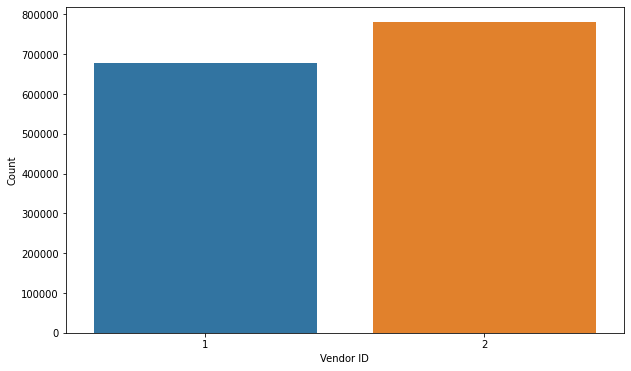

In [ ]:
sns.countplot(data.vendor_id)
plt.xlabel('Vendor ID')
plt.ylabel('Count')
plt.show()

## **column 3 and column 4**: from'pickup_datetime' and 'dropoff_datetime' column we created new feature column like '**pickup_weekday**', '**dropoff_weekday**' '**pickup_weekday_num**', '**pickup_hour 	month**', and '**pickup_timeofday**'.

##**column 5: Passenger_count** <br>
from the graph, we can see that there are few trips with passenger broad a taxi is too low. it may be outliers so going to reomve entries with 0, 7, 8, 9 passenger per trip.


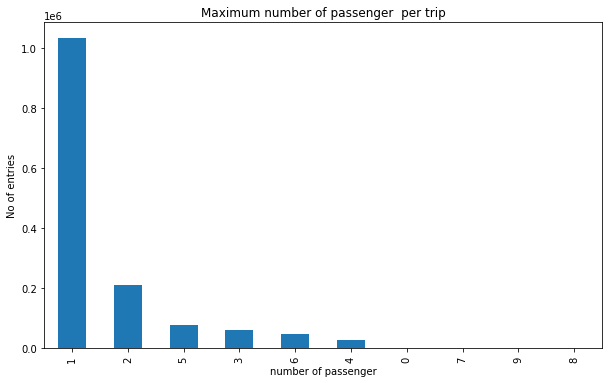

In [ ]:
data.passenger_count.value_counts().plot(kind="bar")
plt.xlabel("number of passenger")
plt.ylabel("No of entries")
plt.title("Maximum number of passenger  per trip")
plt.show()



## column 6: pickup_latitude 	pickup_longitude <br>


In [ ]:
import folium
from folium.plugins import HeatMap
from folium import plugins


In [ ]:
map_NYC = folium.Map([60,-120],zoom_start=7)

In [ ]:
'''station = data[['pickup_longitude','pickup_latitude']]
# convert to (n, 2) nd-array format for heatmap
stationArr = station.values

# plot heatmap
map_NYC.add_child(plugins.HeatMap(stationArr, radius=15))
map_NYC'''

"station = data[['pickup_longitude','pickup_latitude']]\n# convert to (n, 2) nd-array format for heatmap\nstationArr = station.values\n\n# plot heatmap\nmap_NYC.add_child(plugins.HeatMap(stationArr, radius=15))\nmap_NYC"

## column 8 & 9: dropoff_latitude 	dropoff_longitude <br>

In [ ]:
map_NYC = folium.Map([40.80902,-73.94190],zoom_start=7)

In [ ]:
'''station_drop = data[['dropoff_latitude', 'dropoff_longitude']]
# convert to (n, 2) nd-array format for heatmap
stationArr_drop = station_drop.values

# plot heatmap
map_NYC.add_child(plugins.HeatMap(stationArr_drop, radius=15))
map_NYC'''

"station_drop = data[['dropoff_latitude', 'dropoff_longitude']]\n# convert to (n, 2) nd-array format for heatmap\nstationArr_drop = station_drop.values\n\n# plot heatmap\nmap_NYC.add_child(plugins.HeatMap(stationArr_drop, radius=15))\nmap_NYC"

## column 10: Store and forward flag <br>
only two observation  are included in this feature

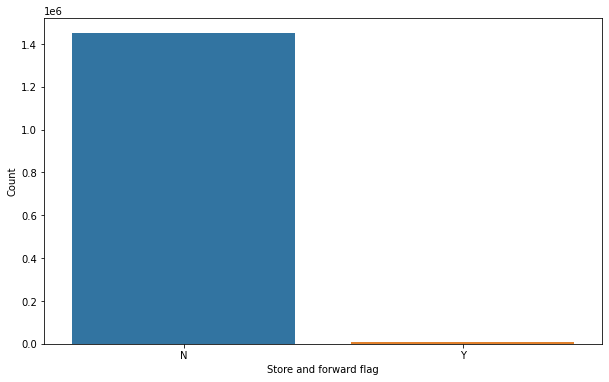

In [ ]:
sns.countplot(x='store_and_fwd_flag',data=data)
plt.ylabel('Count')
plt.xlabel('Store and forward flag')
plt.show()

 We can see that only about 0.5% of the trip details were stored in the vehicle memory first

##column 11: trip duration <br>


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


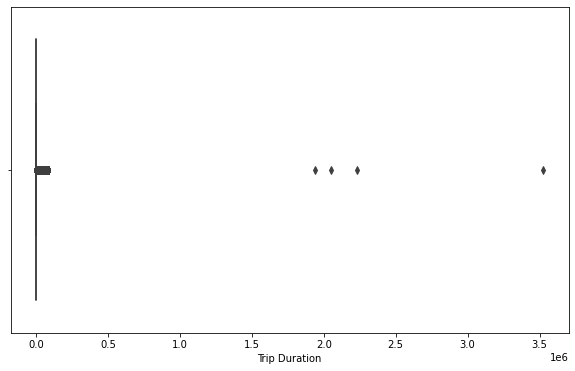

In [ ]:
#create boxplot to check probable outliers
sns.boxplot(data.trip_duration)
plt.xlabel('Trip Duration')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


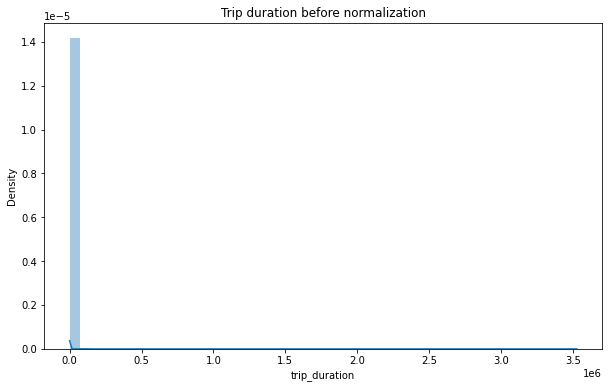

In [ ]:
#to check skewness of data 
sns.distplot(data['trip_duration'],norm_hist=True)
plt.title("Trip duration before normalization")
plt.show()

In [ ]:
print(f" skew coefficient is {data['trip_duration'].skew()}")

 skew coefficient is 343.1639435917362


data is right skewed. using log transformation we can remove skewness.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


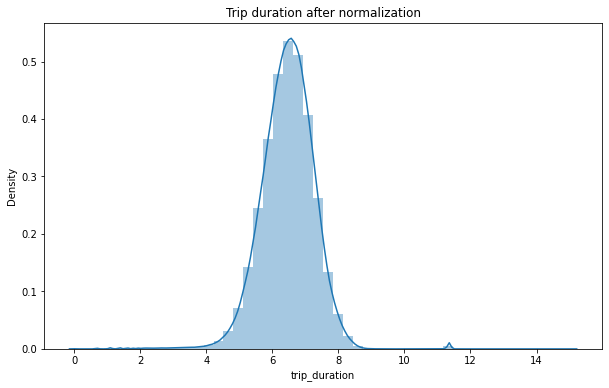

In [ ]:
sns.distplot(np.log(data['trip_duration']))
plt.title("Trip duration after normalization")
plt.show()

In [ ]:
np.log(data['trip_duration'])
data_trip_duration = np.log(data['trip_duration'])
print(f" skew coefficient went from {data['trip_duration'].skew()} to {data_trip_duration.skew()}")

 skew coefficient went from 343.1639435917362 to -0.34070423044801745


## column 12: distance <br>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


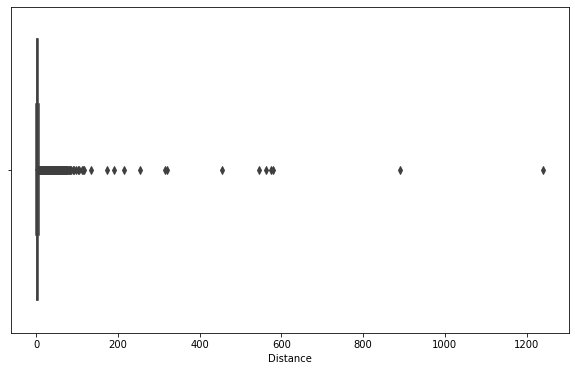

In [ ]:
sns.boxplot(data.distance)
plt.xlabel('Distance')
plt.show()

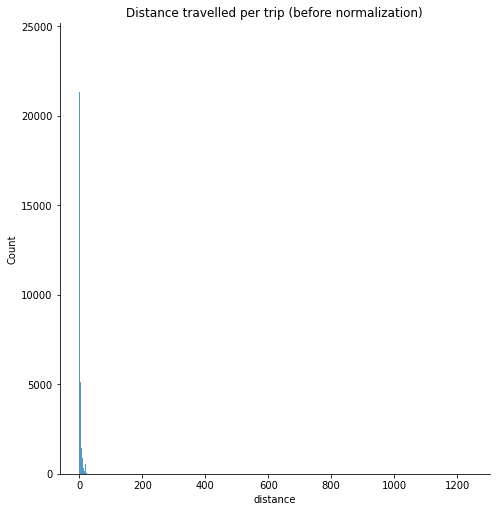

In [ ]:

sns.displot(data=data, x='distance', height=7,aspect=1)
plt.title("Distance travelled per trip (before normalization)")
plt.show()

In [ ]:
print(f"Skew coefficient is {data['distance'].skew()}")

Skew coefficient is 32.63098100465965


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


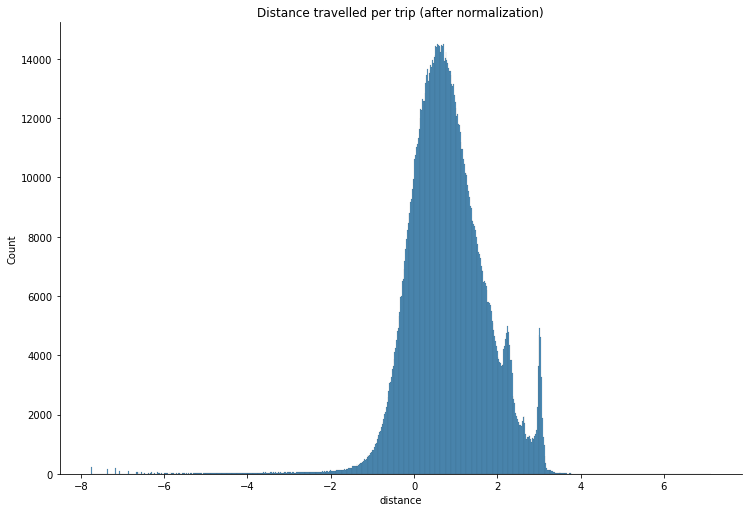

In [ ]:
sns.displot(np.log(data["distance"]), height=7,aspect=1.5)
plt.title("Distance travelled per trip (after normalization)")
plt.show()

In [ ]:
distance_log_skew = np.log(data['distance']).skew()
print(f" Skew coefficient went from {data['distance'].skew()} to {distance_log_skew}")

 Skew coefficient went from 32.63098100465965 to nan


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## column 13: Average speed

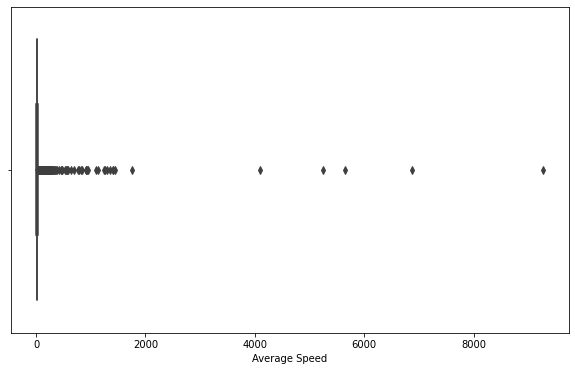

In [ ]:
sns.boxplot(x="avg_speed", data=data)
plt.xlabel('Average Speed')
plt.show()

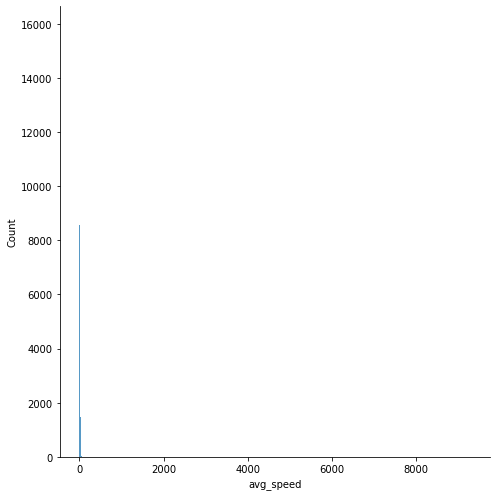

In [ ]:

sns.displot(data=data, x='avg_speed', height=7,aspect=1)
plt.show()

In [ ]:
print(f"Skew coefficient is {data['avg_speed'].skew()}")

Skew coefficient is 314.1581085599962


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


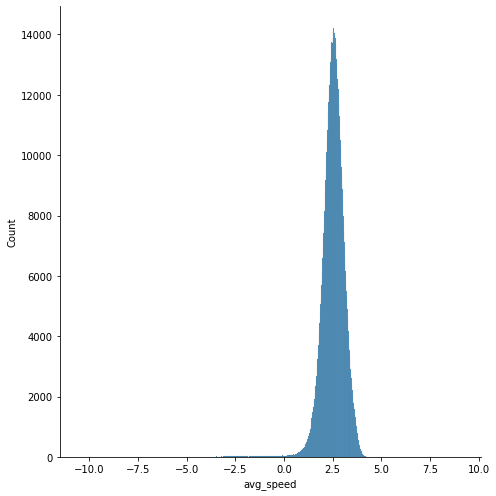

In [ ]:
sns.displot(np.log(data["avg_speed"]), height=7,aspect=1)
plt.show()

In [ ]:
speed_log_skew = np.log(data["avg_speed"]).skew()
print(f" Skew coefficient went from {data['avg_speed'].skew()} to {speed_log_skew}")

 Skew coefficient went from 314.1581085599962 to nan


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


it's 

## column 14 and 15: pickup_weekday and drop off weekday


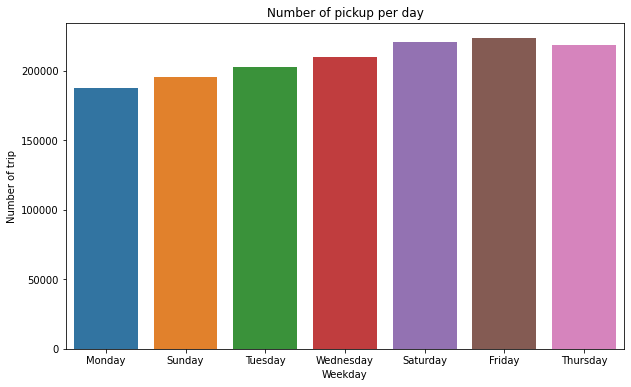

In [ ]:
sns.countplot(data=data, x='pickup_weekday')
plt.ylabel('Number of trip')
plt.xlabel('Weekday')
plt.title('Number of pickup per day')
plt.show()

number of trips not much of changed in different days.


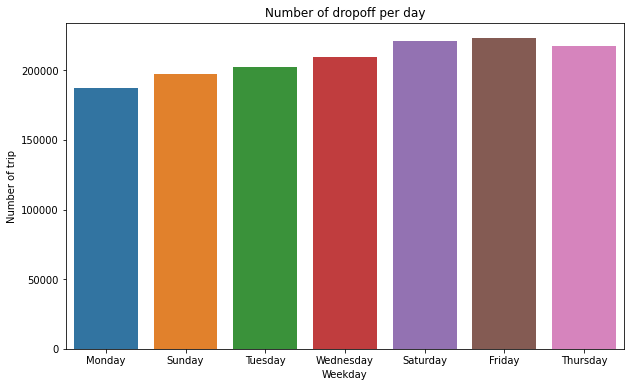

In [ ]:
sns.countplot(data=data, x='dropoff_weekday')
plt.ylabel('Number of trip')
plt.xlabel('Weekday')
plt.title('Number of dropoff per day')
plt.show()

## column 16: pick up hour

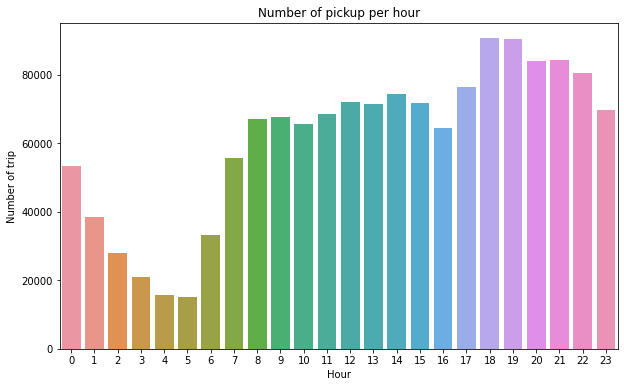

In [ ]:
sns.countplot(data=data, x='pickup_hour')
plt.ylabel('Number of trip')
plt.xlabel('Hour')
plt.title('Number of pickup per hour')
plt.show()

most number of taxi booked in evening session.

## column 17: month

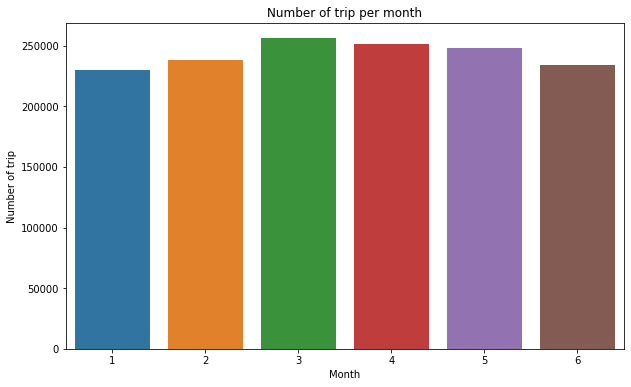

In [ ]:
sns.countplot(data=data, x='month')
plt.ylabel('Number of trip')
plt.xlabel('Month')
plt.title('Number of trip per month')
plt.show()

In [ ]:
data.month.value_counts()

3    256189
4    251645
5    248487
2    238300
6    234316
1    229707
Name: month, dtype: int64

##column 18: pick up time of day

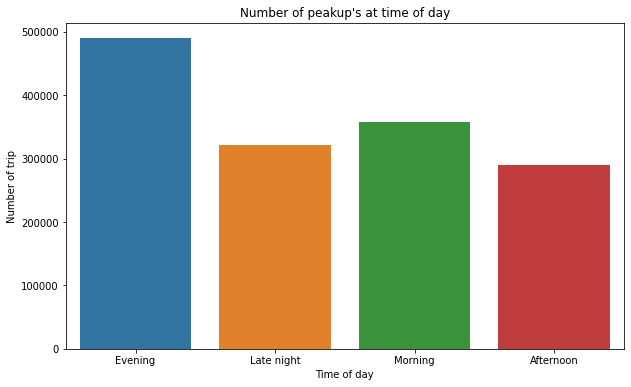

In [ ]:
# bar plot for pickup time of a day
sns.countplot(data=data, x="pickup_timeofday")
plt.xlabel("Time of day")
plt.ylabel("Number of trip")
plt.title("Number of peakup's at time of day")
plt.show()



# Bivariate Analysis

### Trip Duration Vs Vendor

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


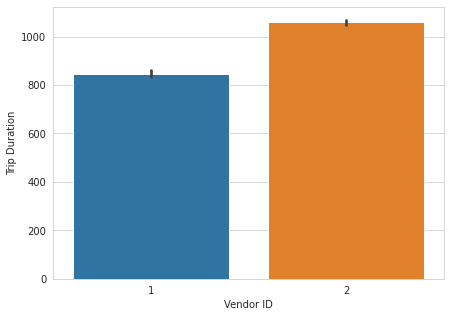

In [ ]:
sns.set_style(style='whitegrid')
plt.figure(figsize = (7,5))
sns.barplot(data.vendor_id,data.trip_duration)
plt.xlabel('Vendor ID')
plt.ylabel('Trip Duration')
plt.show()

* Seems like there is not much difference between Vendoe_ID type 1 and Vendor_ID type 2.

### Trip Duration Vs Store and Forward Flag

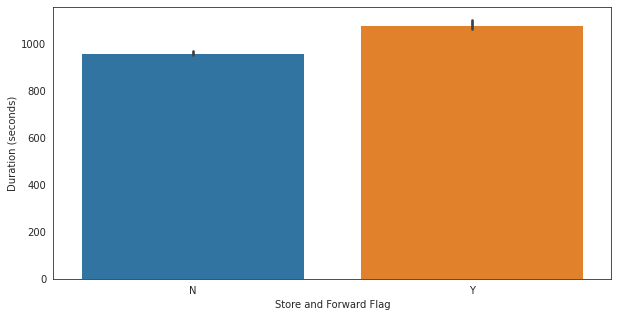

In [ ]:
plt.figure(figsize = (10,5))
sns.set_style(style='white')
sns.barplot(x=data.store_and_fwd_flag, y=data.trip_duration)
plt.xlabel('Store and Forward Flag')
plt.ylabel('Duration (seconds)')
plt.show()

* Y type Store and Forward Flag are relatively taking longer trip duration.
* Also we found that from univariate analysis only 1% data is having Y type Store and Forward Flag

### Trip Duration Vs Pickup Time

Text(0.5, 1.0, 'Line Plot')

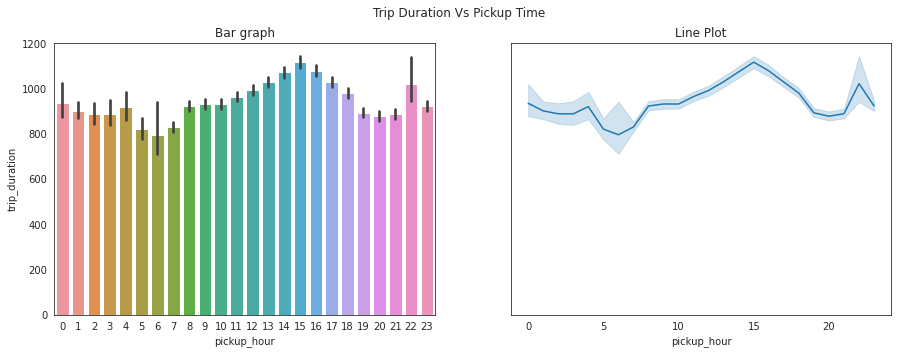

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Trip Duration Vs Pickup Time')

sns.barplot(ax=axes[0], x='pickup_hour',y='trip_duration',data=data)
axes[0].set_title('Bar graph')

sns.lineplot(ax=axes[1], x='pickup_hour',y='trip_duration',data=data)
axes[1].set_title('Line Plot')

*   We see the trip duration is the maximum around 1 pm to 4 pm.
*   Trip duration is the lowest in morning aroud 6 am

### Trip Duration Vs Weekday

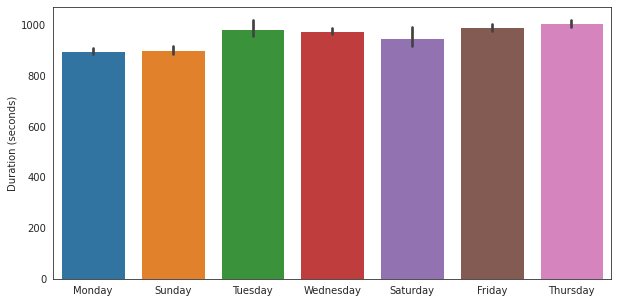

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x='pickup_weekday',y='trip_duration',data=data)
plt.ylabel('Duration (seconds)')
plt.xlabel('')
plt.show()

*   Trip duration on Wednesday is longest among all days.

### Trip Duration Vs Month

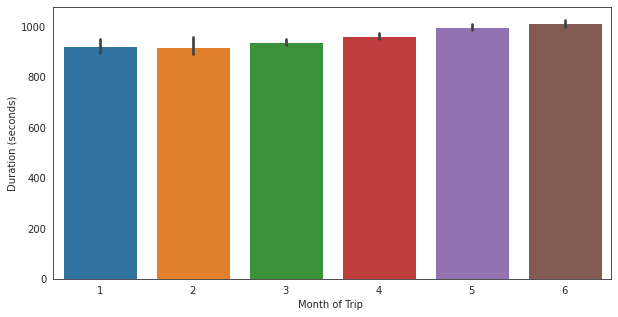

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x='month',y='trip_duration', data=data)
plt.ylabel('Duration (seconds)')
plt.xlabel('Month of Trip ')
plt.show()

* Trip duration gradually increasing from Jan to June

### Trip Duration Vs Distance

Text(0.5, 1.0, 'Scatter plot')

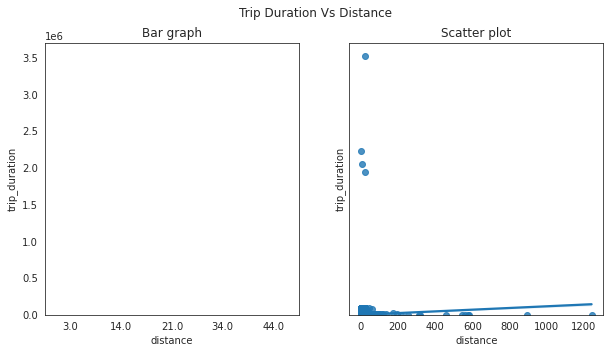

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.suptitle('Trip Duration Vs Distance')

sns.barplot(ax=axes[0], x=data.distance.groupby(pd.cut(data.distance,np.arange(0,60,10))).mean().round(),y='trip_duration'
                                                       ,data=data,ci=None)
axes[0].set_title('Bar graph')

sns.regplot(ax=axes[1],
            x='distance',
            y='trip_duration',
            data=data)
axes[1].set_title('Scatter plot')

* As the distance increases the trip time also increasing

### Distance Vs Hour

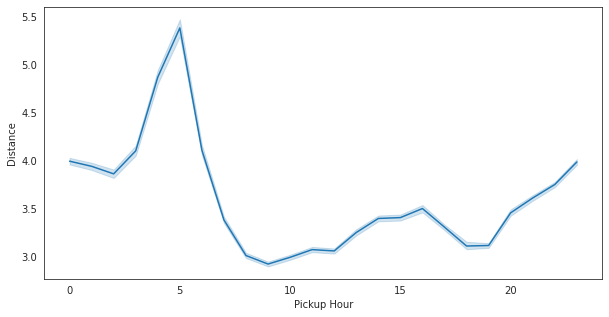

In [ ]:
plt.figure(figsize = (10,5))
sns.lineplot(y='distance',x='pickup_hour',data=data)
plt.ylabel('Distance')
plt.xlabel('Pickup Hour')
plt.show()

*   Trip distance is highest during early morning hours.
*   From 8 am to night 8 pm distance people are riding short distance trips in the range of 3 - 4 kms.



### Distance vs Weekday

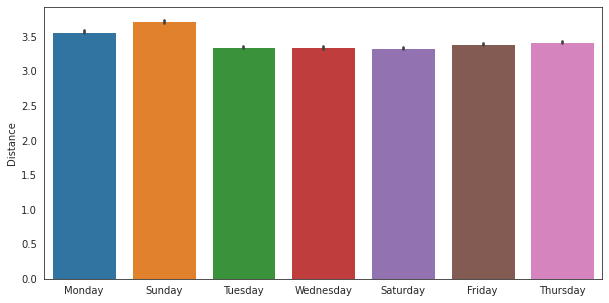

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x='pickup_weekday', y='distance',data=data)
plt.ylabel('Distance')
plt.xlabel('')
plt.show()

* Sunday being at the top may be due to outstation trips

### Distance Vs Month

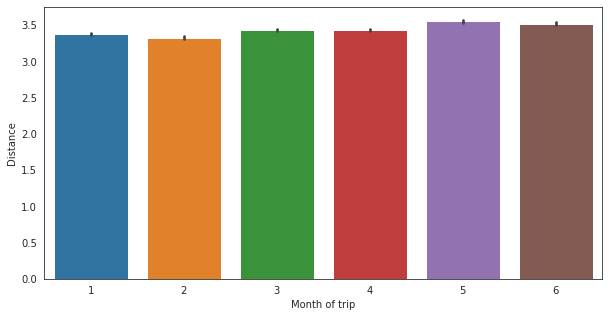

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x='month', y='distance',data=data)
plt.ylabel('Distance')
plt.xlabel('Month of trip')
plt.show()

* There is not much differece in distance travelled in each month

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 19 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  distance            1458644 non-null  float64       
 12  avg_speed           1458644 non-null  float64       
 13  pickup_weekd

# **feature Enginerring** <br>

## **Data cleaing and wrangling**

In [ ]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,avg_speed,pickup_weekday,dropoff_weekday,pickup_weekday_num,pickup_hour,month,pickup_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,11.856445,Monday,Monday,0,17,3,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,9.803673,Sunday,Sunday,6,0,6,Late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385108,10.822216,Tuesday,Tuesday,1,11,1,Morning
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485501,12.465739,Wednesday,Wednesday,2,19,4,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590,9.836608,Saturday,Saturday,5,13,3,Afternoon


In [ ]:
# remove column  "id" and "vendor_id"
data.drop(["id",'pickup_datetime',"dropoff_datetime", "dropoff_longitude", "dropoff_latitude", "pickup_longitude", "pickup_latitude","pickup_hour"],axis=1,inplace= True)

In [ ]:
data.shape

(1458644, 11)

In [ ]:
#remove rows with passenger count value =0,7,8,9
df = data.loc[~(data['passenger_count']==0)]
df = df.loc[~(df['passenger_count'] >= 7)]

In [ ]:
df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
Name: passenger_count, dtype: int64

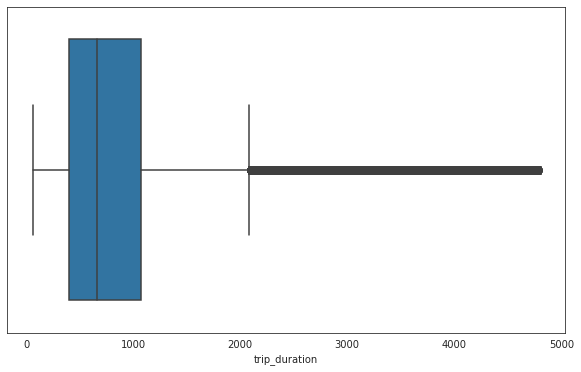

In [ ]:
#remove trip duration greater than 5800 second and less han 60 sec.
df = df.loc[~(df['trip_duration'] >= 4800)]
df = df.loc[~(df['trip_duration'] <= 60)]
#plot boxplot for filtered data
sns.boxplot(data=df,x='trip_duration')
plt.show()

In [ ]:
df.shape

(1445584, 11)

Since we removed the data having greater than 80 min(4800sec) so we can remove the distance travelled > 100 km, and we seen that 99 percentile of the distance travelled is about 24 km

In [ ]:
#remove distance above 200 and avg_speed above 50 km/hr (As 2015, maximum speed limit was 48.28 kmph)
df = df.loc[~((df['distance']>=100) | (df["avg_speed"]>=50))]

In [ ]:
df.shape

(1442988, 11)

In [ ]:
# remove rows if distance travel is zless less tham or equal to 1 (may be it outliers)
df = df[df.distance >= 1]

In [ ]:
df.shape

(1206192, 11)

In [ ]:
#remove 

#corelation 

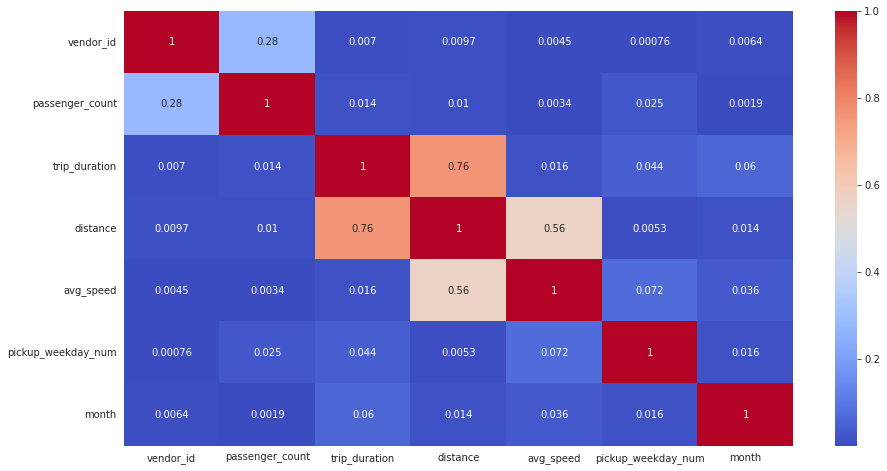

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

As we can see that,  <br>
"Avg_speed" is 56% corealted with distance. <br>
"trip_duration" is 78% corealted with distance.

In [ ]:
#we can also remove "pickup_weekday_num" as "pickup_weekday" and "dropoff_weekday" information also avalibale
df.drop(['pickup_weekday_num'],axis=1,inplace=True)

##check multi collinearity

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
#define function to call multicollinearity
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df.columns

Index(['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'trip_duration',
       'distance', 'avg_speed', 'pickup_weekday', 'dropoff_weekday', 'month',
       'pickup_timeofday'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206192 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1206192 non-null  int64  
 1   passenger_count     1206192 non-null  int64  
 2   store_and_fwd_flag  1206192 non-null  object 
 3   trip_duration       1206192 non-null  int64  
 4   distance            1206192 non-null  float64
 5   avg_speed           1206192 non-null  float64
 6   pickup_weekday      1206192 non-null  object 
 7   dropoff_weekday     1206192 non-null  object 
 8   month               1206192 non-null  int64  
 9   pickup_timeofday    1206192 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 101.2+ MB


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ["vendor_id",'passenger_count','store_and_fwd_flag', 'dropoff_weekday', 'pickup_weekday','month','pickup_timeofday']]])

,variables,VIF
0,trip_duration,4.703395
1,distance,6.048477
2,avg_speed,2.916573


we have also remove the Avg_speed feature from the predictor columns as it highhly  corelated with distance.

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['passenger_count','store_and_fwd_flag', 'dropoff_weekday', 'pickup_weekday','month','pickup_timeofday','avg_speed','vendor_id']]])

,variables,VIF
0,trip_duration,4.652889
1,distance,4.652889


##hot encoding

In [ ]:
df.columns

Index(['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'trip_duration',
       'distance', 'avg_speed', 'pickup_weekday', 'dropoff_weekday', 'month',
       'pickup_timeofday'],
      dtype='object')

In [ ]:
#drop column "pickup_hour"
#df.drop(['avg_speed'],axis=1,inplace=True)

In [ ]:
# One hot encoding
final_data = pd.get_dummies(df, columns=["vendor_id",
                                         "passenger_count",
                                         "store_and_fwd_flag",
                                         "pickup_weekday",
                                         "dropoff_weekday",
                                         "month",
                                         "pickup_timeofday"])

In [ ]:
final_data.head()

,trip_duration,distance,avg_speed,vendor_id_1,vendor_id_2,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_weekday_Friday,pickup_weekday_Monday,pickup_weekday_Saturday,pickup_weekday_Sunday,pickup_weekday_Thursday,pickup_weekday_Tuesday,pickup_weekday_Wednesday,dropoff_weekday_Friday,dropoff_weekday_Monday,dropoff_weekday_Saturday,dropoff_weekday_Sunday,dropoff_weekday_Thursday,dropoff_weekday_Tuesday,dropoff_weekday_Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,pickup_timeofday_Afternoon,pickup_timeofday_Evening,pickup_timeofday_Late night,pickup_timeofday_Morning
0,455,1.498523,11.856445,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,663,1.805510,9.803673,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,2124,6.385108,10.822216,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3,429,1.485501,12.465739,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,435,1.188590,9.836608,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
final_data.shape

(1206192, 37)

Now we see corelation heatmap between each feature to choose best feature.

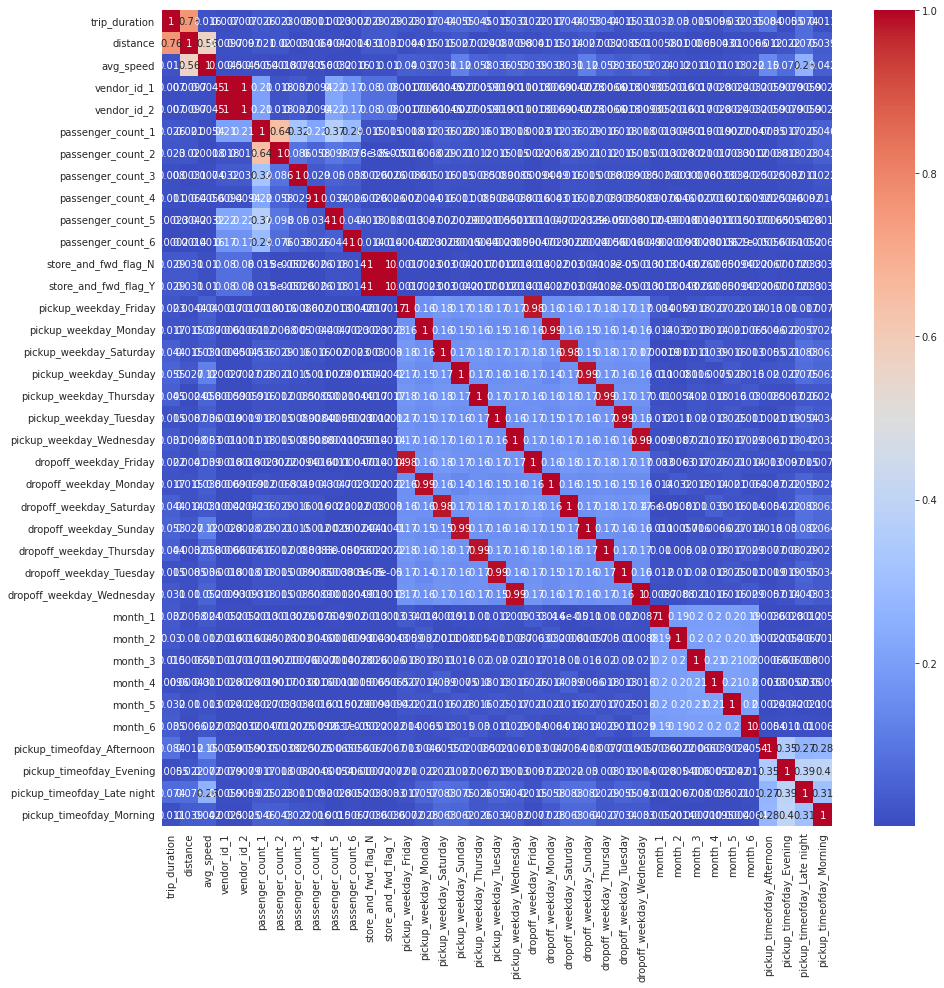

In [ ]:
 ## Correlation
plt.figure(figsize=(15,15))
correlation_1 = final_data.corr()
sns.heatmap(abs(correlation_1), annot=True, cmap='coolwarm')
plt.show()

# build function

In [ ]:
mean_sq_error_train = []
root_mean_sq_error_train = []
r2_list_train = []
adj_r2_list_train = []

mean_sq_error_test = []
root_mean_sq_error_test = []
r2_list_test = []
adj_r2_list_test = []

In [ ]:
#score matrix (MSE, RMSE, r2, Adjusted r2)
def score_matrix(y_train, y_pred_train, y_test, y_pred_test):
  print(f'**Train dataset score**')
  print("\n")
  # Train performance
  MSE_train = mean_squared_error(y_train, y_pred_train)
  print(f'Mean squared error is: {MSE_train }')
  RMSE_train = math.sqrt(mean_squared_error(y_train, y_pred_train))
  print(f'Root Mean squared error is: {RMSE_train}')
  r2_train = r2_score(y_train, y_pred_train)
  print(f'r2: {r2_train}')
  adjusted_r2_train = 1-(1-r2_score(y_train, y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
  print(f'Adjusted r2: {adjusted_r2_train}')
  print("\n")
  #test _performace
  print(f'**Test dataset score**')
  print("\n")
  MSE_test = mean_squared_error(y_test, y_pred_test)
  print(f'Mean squared error is: {MSE_test}')
  RMSE_test = math.sqrt(mean_squared_error(y_test, y_pred_test))
  print(f'Root Mean squared error is: {RMSE_test}')
  r2_test = r2_score(y_test, y_pred_test)
  print(f'r2: {r2_test}')
  adjusted_r2_test = 1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print(f'Adjusted r2: {adjusted_r2_test}')

  mean_sq_error_train.append(MSE_train)
  root_mean_sq_error_train.append(RMSE_train)
  r2_list_train.append(r2_train)
  adj_r2_list_train.append(adjusted_r2_train)

  mean_sq_error_test.append(MSE_test)
  root_mean_sq_error_test.append(RMSE_test)
  r2_list_test.append(r2_test)
  adj_r2_list_test.append(adjusted_r2_test)

In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['mse']
  val_accuracy = history.history['val_mse']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('MSE')
  plt.xlabel('Epochs')
  plt.legend();

#build model 

## train and test spilt


In [ ]:
#importing the libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 

In [ ]:
final_data.head()

,trip_duration,distance,avg_speed,vendor_id_1,vendor_id_2,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_weekday_Friday,pickup_weekday_Monday,pickup_weekday_Saturday,pickup_weekday_Sunday,pickup_weekday_Thursday,pickup_weekday_Tuesday,pickup_weekday_Wednesday,dropoff_weekday_Friday,dropoff_weekday_Monday,dropoff_weekday_Saturday,dropoff_weekday_Sunday,dropoff_weekday_Thursday,dropoff_weekday_Tuesday,dropoff_weekday_Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,pickup_timeofday_Afternoon,pickup_timeofday_Evening,pickup_timeofday_Late night,pickup_timeofday_Morning
0,455,1.498523,11.856445,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,663,1.805510,9.803673,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,2124,6.385108,10.822216,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3,429,1.485501,12.465739,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,435,1.188590,9.836608,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
final_data.shape

(1206192, 37)

In [ ]:
y = final_data['trip_duration']
y.head()

0     455
1     663
2    2124
3     429
4     435
Name: trip_duration, dtype: int64

In [ ]:
from scipy.stats import zscore
#select feature
#minmaxscaler
X = final_data.loc[:,final_data.columns != 'trip_duration']

In [ ]:
X.head()

,distance,avg_speed,vendor_id_1,vendor_id_2,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_weekday_Friday,pickup_weekday_Monday,pickup_weekday_Saturday,pickup_weekday_Sunday,pickup_weekday_Thursday,pickup_weekday_Tuesday,pickup_weekday_Wednesday,dropoff_weekday_Friday,dropoff_weekday_Monday,dropoff_weekday_Saturday,dropoff_weekday_Sunday,dropoff_weekday_Thursday,dropoff_weekday_Tuesday,dropoff_weekday_Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,pickup_timeofday_Afternoon,pickup_timeofday_Evening,pickup_timeofday_Late night,pickup_timeofday_Morning
0,1.498523,11.856445,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,1.805510,9.803673,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,6.385108,10.822216,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3,1.485501,12.465739,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,1.188590,9.836608,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
X.shape

(1206192, 36)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206192 entries, 0 to 1458643
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   distance                     1206192 non-null  float64
 1   avg_speed                    1206192 non-null  float64
 2   vendor_id_1                  1206192 non-null  uint8  
 3   vendor_id_2                  1206192 non-null  uint8  
 4   passenger_count_1            1206192 non-null  uint8  
 5   passenger_count_2            1206192 non-null  uint8  
 6   passenger_count_3            1206192 non-null  uint8  
 7   passenger_count_4            1206192 non-null  uint8  
 8   passenger_count_5            1206192 non-null  uint8  
 9   passenger_count_6            1206192 non-null  uint8  
 10  store_and_fwd_flag_N         1206192 non-null  uint8  
 11  store_and_fwd_flag_Y         1206192 non-null  uint8  
 12  pickup_weekday_Friday        1206192 non-n

In [ ]:
#split train and test data
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(964953, 36)
(241239, 36)


In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression().fit(X_train,y_train)

In [ ]:
linear_regression.score(X_train,y_train)

0.8312853535638637

In [ ]:
linear_regression.coef_

array([ 1.07910823e+04, -2.50328818e+03,  4.18587278e+15,  4.18587278e+15,
       -5.16287526e+13, -5.16287526e+13, -5.16287526e+13, -5.16287526e+13,
       -5.16287526e+13, -5.16287526e+13,  6.74768395e+13,  6.74768395e+13,
       -1.70564776e+14, -1.70564776e+14, -1.70564776e+14, -1.70564776e+14,
       -1.70564776e+14, -1.70564776e+14, -1.70564776e+14, -1.26486332e+14,
       -1.26486332e+14, -1.26486332e+14, -1.26486332e+14, -1.26486332e+14,
       -1.26486332e+14, -1.26486332e+14, -1.46286449e+14, -1.46286449e+14,
       -1.46286449e+14, -1.46286449e+14, -1.46286449e+14, -1.46286449e+14,
        5.68436333e+14,  5.68436333e+14,  5.68436333e+14,  5.68436333e+14])

In [ ]:
linear_regression.intercept_

-4326819644326420.0

In [ ]:
y_pred_train =linear_regression.predict(X_train)

In [ ]:
y_pred = linear_regression.predict(X_test)

In [ ]:
X_train.shape

(964953, 36)

In [ ]:
d = pd.DataFrame({"actual":y_test,"predicted":y_pred})

d.head()

,actual,predicted
230531,2412,1760.5
766312,325,519.0
1121263,793,867.5
121946,1699,1459.5
782711,619,570.5


In [ ]:
score_matrix(y_train=y_train, y_pred_train = y_pred_train, y_test = y_test, y_pred_test=y_pred )

**Train dataset score**


Mean squared error is: 68090.04799922898
Root Mean squared error is: 260.9406982423956
r2: 0.8312853535638637
Adjusted r2: 0.8312790589980448


**Test dataset score**


Mean squared error is: 68605.07107370699
Root Mean squared error is: 261.92569761996816
r2: 0.8309102586367068
Adjusted r2: 0.830885021571139


In [ ]:
"""#model regession line in test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color ='red', linewidth=3)
plt.title('Linear_regression')
plt.show()"""

"#model regession line in test set\nplt.scatter(X_test, y_test)\nplt.plot(X_test, y_pred, color ='red', linewidth=3)\nplt.title('Linear_regression')\nplt.show()"

#implementing Lasso regression

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.01 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.score(X_train, y_train)

0.831318976703739

In [ ]:
lasso.coef_

array([ 1.07873676e+04, -2.50182655e+03,  9.52625978e-01, -0.00000000e+00,
       -1.36751154e+00,  4.78763018e-01, -0.00000000e+00,  3.70373707e+00,
       -1.54855382e+00,  0.00000000e+00, -1.14240175e+01,  2.64657747e-13,
        2.99313901e+01, -4.66677994e+01, -2.41641896e+01, -9.42700680e+01,
        5.14160104e+01, -0.00000000e+00,  3.66042214e+01, -2.87175666e+01,
        2.53983678e+01,  4.94163901e+00,  7.24141081e+01, -3.67285974e+01,
        0.00000000e+00, -2.35706595e+01, -2.31202416e+01, -2.09303449e+01,
       -1.68476248e+01,  2.36733222e-03,  1.34839809e+01,  1.49120848e+01,
        1.15304062e+01, -1.43057181e+01, -2.51232284e-01,  3.65523206e+00])

cross validation

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21924484211.184067, tolerance: 26015229.006796423
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21802605280.50897, tolerance: 25923777.80616396
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21960556263.312138, tolerance: 25948348.39137137
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 219244840

GridSearchCV(cv=3, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -68080.78036397388


In [ ]:
y_pred_train_lasso = lasso_regressor.predict(X_train)

In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
score_matrix(y_train=y_train, y_pred_train = y_pred_train_lasso, y_test = y_test, y_pred_test=y_pred_lasso )

**Train dataset score**


Mean squared error is: 68074.64192720785
Root Mean squared error is: 260.9111763171671
r2: 0.8313235269837744
Adjusted r2: 0.8313172338421657


**Test dataset score**


Mean squared error is: 68590.25914892177
Root Mean squared error is: 261.8974210428995
r2: 0.8309467653335416
Adjusted r2: 0.8309215337166893


#implementng Ridge regression

In [ ]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.01)

In [ ]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge.score(X_train, y_train)

0.8313235274781927

In [ ]:
y_pred_train_ridge = ridge.predict(X_train)

In [ ]:
y_pred_ridge = ridge.predict(X_test)

In [ ]:
score_matrix(y_train=y_train, y_pred_train = y_pred_train_ridge, y_test = y_test, y_pred_test=y_pred_ridge )

**Train dataset score**


Mean squared error is: 68074.64172766994
Root Mean squared error is: 260.91117593478043
r2: 0.8313235274781927
Adjusted r2: 0.8313172343366024


**Test dataset score**


Mean squared error is: 68590.2532859188
Root Mean squared error is: 261.89740984957984
r2: 0.8309467797839843
Adjusted r2: 0.8309215481692889


crossvalidation

In [ ]:
##cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -68080.78075537832


In [ ]:
#Model Prediction
#train 
y_pred_ridge_cv_train = ridge_regressor.predict(X_train)
y_pred_ridge_cv = ridge_regressor.predict(X_test)


In [ ]:
score_matrix(y_train=y_train, y_pred_train = y_pred_ridge_cv_train, y_test = y_test, y_pred_test=y_pred_ridge_cv )

**Train dataset score**


Mean squared error is: 68074.64172766994
Root Mean squared error is: 260.91117593478043
r2: 0.8313235274781927
Adjusted r2: 0.8313172343366024


**Test dataset score**


Mean squared error is: 68590.2532859188
Root Mean squared error is: 261.89740984957984
r2: 0.8309467797839843
Adjusted r2: 0.8309215481692889


#desicion tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_reg = DecisionTreeRegressor( max_leaf_nodes=10, random_state=0)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
dt_y_predicted_train = dt_reg.predict(X_train)

In [ ]:
#prediction on test set
dt_y_predicted =dt_reg.predict(X_test)

In [ ]:
score_matrix(y_train=y_train, y_pred_train = dt_y_predicted_train, y_test = y_test, y_pred_test=dt_y_predicted )

**Train dataset score**


Mean squared error is: 88915.35690173325
Root Mean squared error is: 298.1867819031106
r2: 0.7796840589304819
Adjusted r2: 0.7796758391746912


**Test dataset score**


Mean squared error is: 89850.49298472104
Root Mean squared error is: 299.7507180720691
r2: 0.7785470318392609
Adjusted r2: 0.7785139794315122


cross validation

In [ ]:
param_grid = { 'max_depth': [5, 10, 15, None],
              'max_features': ['auto', 'log2']}

dt = DecisionTreeRegressor()
dt_cv = GridSearchCV(estimator = dt, param_grid = param_grid, cv=3, refit=True)
dt_cv.fit(X_train,y_train)


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 10, 15, None],
                         'max_features': ['auto', 'log2']},
             pre_dispatch='2*n_jobs', 

In [ ]:
print("The best fit alpha value is found out to be :" ,dt_cv.best_params_)
print("\nUsing ",dt_cv.best_params_, " the negative mean squared error is: ", dt_cv.best_score_)

The best fit alpha value is found out to be : {'max_depth': None, 'max_features': 'auto'}

Using  {'max_depth': None, 'max_features': 'auto'}  the negative mean squared error is:  0.9997434816695066


In [ ]:
dt_cv_y_pred_train = dt_cv.predict(X_train)


In [ ]:
#prediction on test set
dt_cv_y_predicted =dt_reg.predict(X_test)

In [ ]:
score_matrix(y_train=y_train, y_pred_train = dt_cv_y_pred_train, y_test = y_test, y_pred_test=dt_cv_y_predicted )

**Train dataset score**


Mean squared error is: 0.0
Root Mean squared error is: 0.0
r2: 1.0
Adjusted r2: 1.0


**Test dataset score**


Mean squared error is: 89850.49298472104
Root Mean squared error is: 299.7507180720691
r2: 0.7785470318392609
Adjusted r2: 0.7785139794315122


# Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state = 0)
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 
              'max_features': ['auto', 'log2'], 
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
g_search = GridSearchCV(estimator = rfr,
                        param_grid = param_grid,
                        cv = 3,
                        n_jobs = 1,
                        verbose = 0,
                        return_train_score=True)
g_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [ ]:
print("The best fit alpha value is found out to be :" ,g_search.best_params_)
print("\nUsing ",g_search.best_params_, " the negative mean squared error is: ", g_search.best_score_)

The best fit alpha value is found out to be : {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 15}

Using  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 15}  the negative mean squared error is:  0.9999117973761485


In [ ]:
#prediction on train set
rf_cv_y_pred_train = g_search.predict(X_train)

In [ ]:
#prediction on test set
rf_cv_y_predicted =g_search.predict(X_test)

In [ ]:
score_matrix(y_train=y_train, y_pred_train = rf_cv_y_pred_train, y_test = y_test, y_pred_test=rf_cv_y_predicted )

**Train dataset score**


Mean squared error is: 5.050439707080728
Root Mean squared error is: 2.247318336836312
r2: 0.9999874859370119
Adjusted r2: 0.9999874854701254


**Test dataset score**


Mean squared error is: 19.763609606149
Root Mean squared error is: 4.4456281452848705
r2: 0.9999512889705614
Adjusted r2: 0.9999512817003188


##Feature importance

In [ ]:
importance_df= pd.DataFrame({'Features': X.describe().columns, 'Feature_importance': list(g_search.best_estimator_.feature_importances_)})
importance_df.head()

,Features,Feature_importance
0,distance,0.678718
1,avg_speed,0.321239
2,vendor_id_1,0.000002
3,vendor_id_2,0.000002
4,passenger_count_1,0.000002


In [ ]:
#sorting
importance_df.sort_values(by=['Feature_importance'],ascending=False,inplace=True)

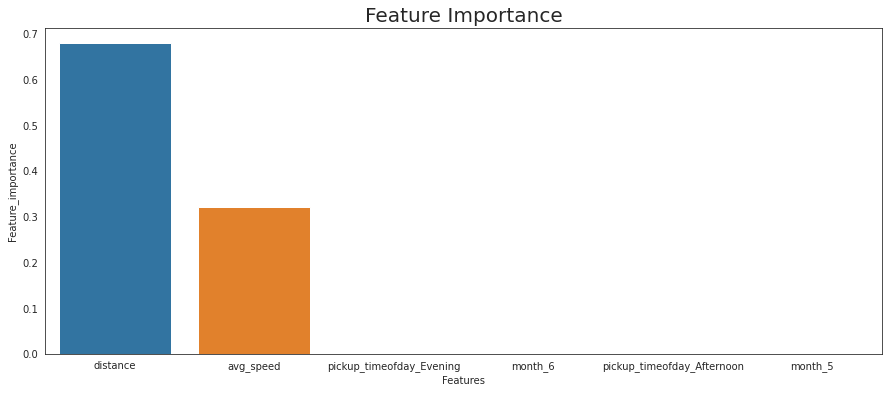

In [ ]:
# Ploting feature importances
plt.figure(figsize=(15,6))
plt.title('Feature Importance', fontsize=20)
sns.barplot(x='Features',y="Feature_importance", data=importance_df[:6])
plt.show()

#XGboost

In [ ]:
import xgboost as XGB

In [ ]:
# create xgboost regression model
xg_model = XGB.XGBRegressor()
xgb_parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.0001,0.01,0.03, 0.05, 0.07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'subsample': [0.7],
              'colsample_bytree': [0.7]}

cros validation


In [ ]:
from sklearn.model_selection import GridSearchCV
# cross calidation
xg_cv = GridSearchCV(xg_model,
                     xgb_parameters,
                     cv=3,
                     n_jobs=5,
                     verbose=True)
#evalution model
xg_cv.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed: 97.3min finished


[16:47:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.0001, 0.01, 0.03, 0.05, 0.07],
       

In [ ]:
print("The best fit alpha value is found out to be :" ,xg_cv.best_params_)
print("\nUsing ",xg_cv.best_params_, " the negative mean squared error is: ", xg_cv.best_score_)

The best fit alpha value is found out to be : {'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'nthread': 4, 'objective': 'reg:linear', 'subsample': 0.7}

Using  {'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'nthread': 4, 'objective': 'reg:linear', 'subsample': 0.7}  the negative mean squared error is:  0.9991280961243882


In [ ]:
#prediction on train set
xgb_cv_y_pred_train = xg_cv.predict(X_train)

In [ ]:
#prediction on test set
xgb_cv_y_predicted =xg_cv.predict(X_test)

In [ ]:
score_matrix(y_train=y_train, y_pred_train = xgb_cv_y_pred_train, y_test = y_test, y_pred_test=xgb_cv_y_predicted )

**Train dataset score**


Mean squared error is: 508.5940970804688
Root Mean squared error is: 22.55203088594171
r2: 0.9987397971393792
Adjusted r2: 0.9987397501225374


**Test dataset score**


Mean squared error is: 563.6204928907406
Root Mean squared error is: 23.740692763496615
r2: 0.9986108542433029
Adjusted r2: 0.9986106469098345


##SHAP <br>
XGBooost shap

In [ ]:
pip install shap

     |████████████████████████████████| 356 kB 25.4 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491647 sha256=78ffc0dd705080df942a762e9ef7eaec6d00fbcbad9dc3fbd7770dcf6c9f3b9c
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
from sklearn.tree import export_graphviz
import shap 
sns.set_style('darkgrid')

In [ ]:
# choseing an instance from test data
for_instance=2

In [ ]:
# shap for xgboost model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(xg_cv.best_estimator_)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

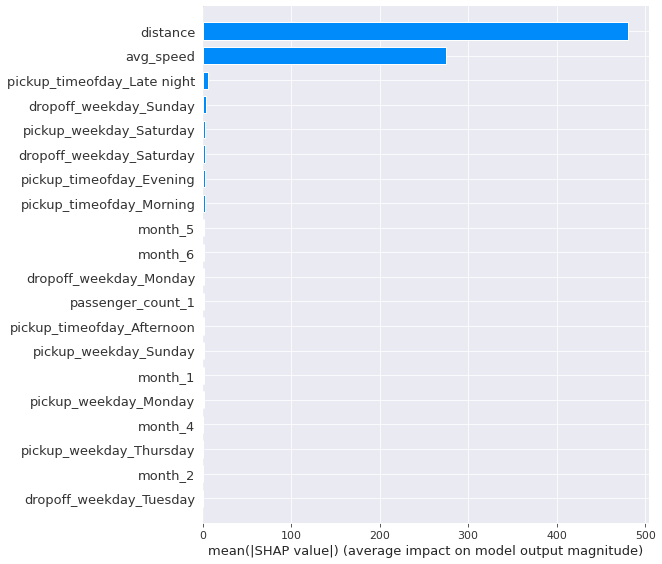

In [ ]:
shap.summary_plot(shap_values, X_train, feature_names=X.columns ,plot_type="bar")

# Deep Learning Model

In [ ]:
import tensorflow as tf
# Set random seed
tf.random.set_seed(42)

# Create the model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1,activation='relu')
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mse, 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['mse'])

# Fit the model
history = model.fit(X_train, y_train,
            validation_data=(X_test,y_test),
            epochs=25)

Epoch 1/25
30155/30155 [==============================] - 53s 2ms/step - loss: 49550.1055 - mse: 49550.1055 - val_loss: 38460.2266 - val_mse: 38460.2266
Epoch 2/25
30155/30155 [==============================] - 56s 2ms/step - loss: 23224.1328 - mse: 23224.1328 - val_loss: 2608.7166 - val_mse: 2608.7166
Epoch 3/25
30155/30155 [==============================] - 56s 2ms/step - loss: 1612.7828 - mse: 1612.7828 - val_loss: 979.2153 - val_mse: 979.2153
Epoch 4/25
30155/30155 [==============================] - 58s 2ms/step - loss: 1189.2367 - mse: 1189.2367 - val_loss: 947.3641 - val_mse: 947.3641
Epoch 5/25
30155/30155 [==============================] - 57s 2ms/step - loss: 1023.6949 - mse: 1023.6949 - val_loss: 677.9727 - val_mse: 677.9727
Epoch 6/25
30155/30155 [==============================] - 51s 2ms/step - loss: 930.4956 - mse: 930.4956 - val_loss: 1085.3490 - val_mse: 1085.3490
Epoch 7/25
30155/30155 [==============================] - 51s 2ms/step - loss: 878.2172 - mse: 878.2172 - va

In [ ]:
dl_tran_preds = model.predict(X_train)

In [ ]:
# Making predictions
dl_preds = model.predict(X_test)

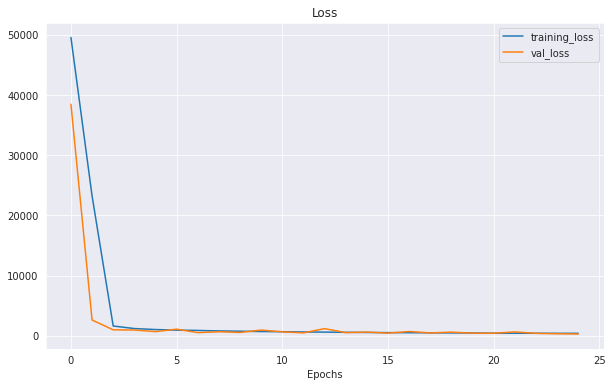

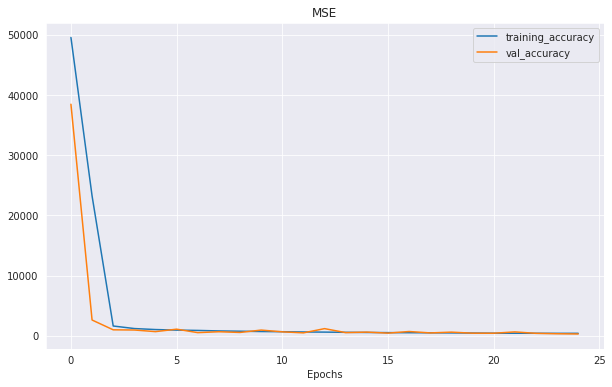

In [ ]:
plot_loss_curves(history)

In [ ]:
# Printing evaluation metrics
score_matrix(y_train=y_train, y_pred_train = dl_tran_preds, y_test = y_test, y_pred_test=dl_preds)

**Train dataset score**


Mean squared error is: 286.3737633519722
Root Mean squared error is: 16.922581462412058
r2: 0.9992904183555127
Adjusted r2: 0.9992903918817686


**Test dataset score**


Mean squared error is: 288.6856020907014
Root Mean squared error is: 16.990750486388215
r2: 0.9992884815505784
Adjusted r2: 0.9992883753546754


From above all Models Randomforest did the better job

In [ ]:
importance_df= pd.DataFrame({'Features': X.describe().columns, 'Feature_importance': list(g_search.best_estimator_.feature_importances_)})
importance_df.head()

,Features,Feature_importance
0,distance,0.678718
1,avg_speed,0.321239
2,vendor_id_1,0.000002
3,vendor_id_2,0.000002
4,passenger_count_1,0.000002


In [ ]:
#sorting
importance_df.sort_values(by=['Feature_importance'],ascending=False,inplace=True)

Lets see importance bar graph

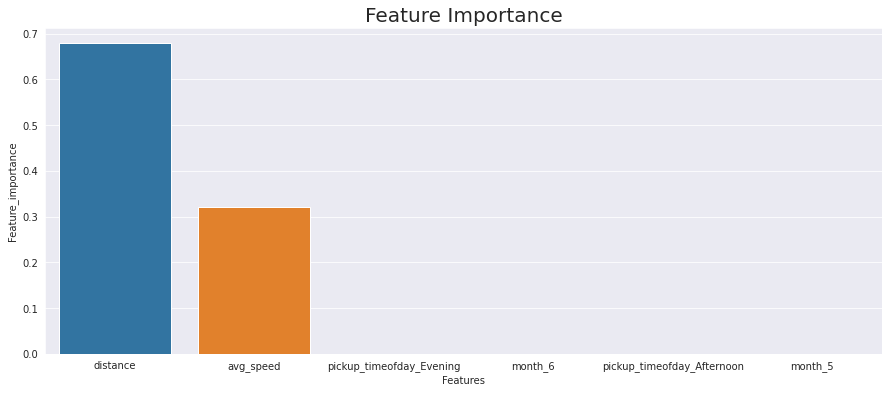

In [ ]:
# Ploting feature importances
plt.figure(figsize=(15,6))
plt.title('Feature Importance', fontsize=20)
sns.barplot(x='Features',y="Feature_importance", data=importance_df[:6])
plt.show()

Clearly, we can see distance is the top contributor to trip duration followed by speed.

Plotting the error term distribution

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


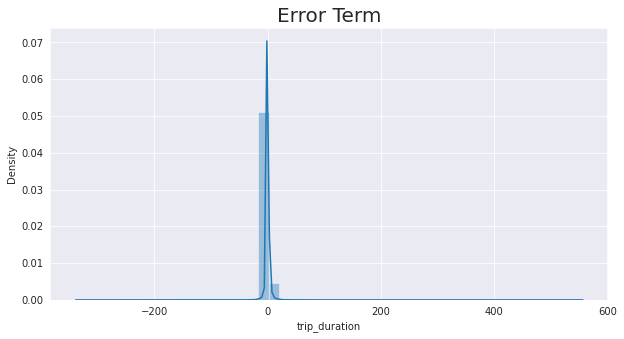

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(y_test - rf_cv_y_predicted )
plt.title('Error Term', fontsize=20)
plt.show()

Clearly we can see that error in prediction is less than 2 minutes.

**Models Summary for the Train data.**

# performance

In [ ]:
#creating dictionary to store all the metrices 
dict={'Mean_square_error_train':mean_sq_error_train,'Mean_square_error_test':mean_sq_error_test,
      'Root_Mean_square_error_train':root_mean_sq_error_train,'Root_Mean_square_error_test':root_mean_sq_error_test,
      'R2_train':r2_list_train,'R2_test':r2_list_test,
      'Adjusted_R2_train':adj_r2_list_train, 'Adjusted_R2_test':adj_r2_list_test}

In [ ]:
# list of all models
model_name=['Linear','Lasso_grid','Ridge',"Ridge_grid",'Decision_Tree','Decision_Tree grid','Random_Forest_grid','Xtreme_GB','Neurwl Network']

In [ ]:
# converting dictionary to dataframe
matrix_df=pd.DataFrame.from_dict(dict,orient="index",columns=model_name)

In [ ]:
# taking the transpose of the dataframe to make it more visual appealing
matrix_df.transpose().reset_index().rename(columns={'index':'Models'})

,Models,Mean_square_error_train,Mean_square_error_test,Root_Mean_square_error_train,Root_Mean_square_error_test,R2_train,R2_test,Adjusted_R2_train,Adjusted_R2_test
0,Linear,68090.047999,68605.071074,260.940698,261.925698,0.831285,0.830910,0.831279,0.830885
1,Lasso_grid,68074.641927,68590.259149,260.911176,261.897421,0.831324,0.830947,0.831317,0.830922
2,Ridge,68074.641728,68590.253286,260.911176,261.897410,0.831324,0.830947,0.831317,0.830922
3,Ridge_grid,68074.641728,68590.253286,260.911176,261.897410,0.831324,0.830947,0.831317,0.830922
4,Decision_Tree,88915.356902,89850.492985,298.186782,299.750718,0.779684,0.778547,0.779676,0.778514
5,Decision_Tree grid,0.000000,89850.492985,0.000000,299.750718,1.000000,0.778547,1.000000,0.778514
6,Random_Forest_grid,5.050440,19.763610,2.247318,4.445628,0.999987,0.999951,0.999987,0.999951
7,Xtreme_GB,508.594097,563.620493,22.552031,23.740693,0.998740,0.998611,0.998740,0.998611
8,Neurwl Network,286.373763,288.685602,16.922581,16.990750,0.999290,0.999288,0.999290,0.999288


# **Conclusion**

*   We can see that MSE, RMSE,R^2and Adjusted R^2 which are the metrics used to evaluate the performance of regression model of **Random Forest**, **XGBoost Regressor** and **Neural Network** are not varying much during traing and testing time.
 
 
*   The Linear models don't show good performance on our training and testing environment.

 
 
 
 
*   From above table we can conclude  that **Random Forest Regressor** is the best models as compare to the other models to predict the trip duration for a particular taxi.